In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#q44

In [17]:
data = np.array([8,9,8,10,9,10,12,10])
mean = np.mean(data)
range = np.ptp(data)
ad = 0
for i in data:
    ad+=abs(i-mean)
ad = ad/len(data)
std = np.std(data,ddof=1)
print('Range:',range)
print('Average Deviation:',ad)
print('Standard Deviation:',std)


Range: 4
Average Deviation: 1.0
Standard Deviation: 1.3093073414159542


#Q45

In [18]:
data = np.array([21,60,47,54,17,72,55,33,41])
mean = np.mean(data)
range = np.ptp(data)
ad = 0
for i in data:
    ad+=abs(i-mean)
ad = ad/len(data)
std = np.std(data,ddof=1)
print('Range:',range)
print('Average Deviation:',ad)
print('Standard Deviation:',std)


Range: 55
Average Deviation: 14.617283950617283
Standard Deviation: 18.221629394150728


#Q46

In [14]:
data = np.array([12,6,7,3,10])
mean = np.mean(data)
range = np.ptp(data)
ad = 0
for i in data:
    ad+=abs(i-mean)
ad = ad/len(data)
std = np.std(data,ddof=1)
print('Range:',range)
print('Average Deviation:',ad)
print('Standard Deviation:',std)


Range: 9
Average Deviation: 2.7199999999999998
Standard Deviation: 3.5071355833500366


#Q47

In [21]:
data = np.array([83,510,33,256,401,47,23]) * 1000
mean = np.mean(data)
range = np.ptp(data)
ad = 0
for i in data:
    ad+=abs(i-mean)
ad = ad/len(data)
std = np.std(data)
print('Range:',range)
print('Average Deviation:',ad)
print('Standard Deviation:',std)
print('C.V:',std*100/mean)

Range: 487000
Average Deviation: 167755.10204081633
Standard Deviation: 183473.40351102216
C.V: 94.92341645063969


#Q48

In [22]:
data = np.array([74,79,81,80,78])
mean = np.mean(data)
range = np.ptp(data)
ad = 0
for i in data:
    ad+=abs(i-mean)
ad = ad/len(data)
std = np.std(data)
print('Range:',range)
print('Average Deviation:',ad)
print('Standard Deviation:',std)
print('C.V:',std*100/mean)

Range: 7
Average Deviation: 1.9199999999999988
Standard Deviation: 2.416609194718914
C.V: 3.082409687141472


#Q49

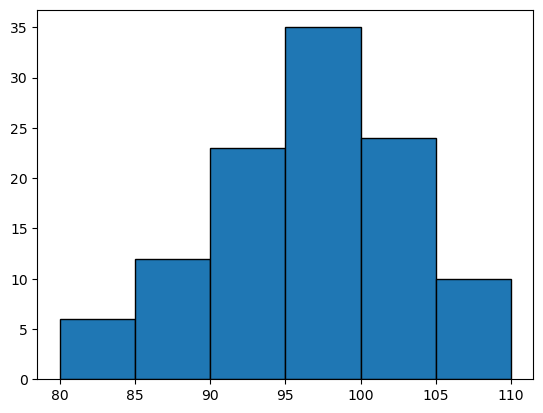

In [54]:
bin_edges = [80,85,90,95,100,105,110]
freq,bins,patches = plt.hist(bin_edges[:-1],bin_edges,weights=[6,12,23,35,24,10],edgecolor='black')

In [84]:
df = pd.DataFrame({'Lower Limit':[80,85,90,95,100,105],'Upper Limit':[84,89,94,99,104,109],'Freq':freq})
df['Midpoint'] = (df['Upper Limit'] + df['Lower Limit'])/2
df['cumsum'] = df['Freq'].cumsum()
range = bins[-1] - bins[0]
n = df['Freq'].sum()
df

,Lower Limit,Upper Limit,Freq,Midpoint,cumsum
0,80,84,6.0,82.0,6.0
1,85,89,12.0,87.0,18.0
2,90,94,23.0,92.0,41.0
3,95,99,35.0,97.0,76.0
4,100,104,24.0,102.0,100.0
5,105,109,10.0,107.0,110.0


In [85]:
# Assuming 'n' is the total number of observations
n = len(df)

# Calculate the mean
mean = (df['Midpoint'] * df['Freq']).sum() / df['Freq'].sum()

# Calculate the sum of squared differences
sum_squared_diff = ((df['Midpoint'] - mean) ** 2 * df['Freq']).sum()

# Calculate the variance and take the square root
std = np.sqrt(sum_squared_diff / (n - 1))

# Result
print(std)


30.413065374186562


In [69]:
percent = 25
p_position  = percent*0.01*df['cumsum'].iloc[-1]
p_index = np.argmax(df['cumsum']>p_position)
cf = df['cumsum'].iloc[p_index-1]
cw = df['Lower Limit'].diff()[1]
percentile = df['Lower Limit'].iloc[p_index] + (p_position-cf)*cw/df['Freq'][p_index]
percentile

92.06521739130434

In [152]:

def calculate_percentile(df, percent):
    p_position = percent * 0.01 * df['cumsum'].iloc[-1]
    p_index = np.argmax(df['cumsum'] > p_position)
    
    cf = df['cumsum'].iloc[p_index - 1]
    cw = df['Lower Limit'].diff()[1]
    
    percentile = df['Lower Limit'].iloc[p_index] + (p_position - cf) * cw / df['Freq'].iloc[p_index]
    
    return percentile





def create_input_dataframe(lower_limits, upper_limit, frequencies):
    data = {'Lower Limit': lower_limits, 'Upper Limit': upper_limit, 'Freq': frequencies}
    df = pd.DataFrame(data)
    
    # Add 'cumsum' column
    df['cumsum'] = df['Freq'].cumsum()
    df['Midpoint'] = (df['Lower Limit'] + df['Upper Limit'])/2
    
    return df


In [79]:
print('Range:',df['Upper Limit'].iloc[-1]-df['Lower Limit'].iloc[0])
print('Standard Deviation:',std)
print('Interquartile range:',calculate_percentile(df,75)-calculate_percentile(df,25))
print('10-90 percentile range:',calculate_percentile(df,90)-calculate_percentile(df,10))

Range: 29
Standard Deviation: nan
Interquartile range: 9.288949275362327
10-90 percentile range: 17.708333333333343


#q50

In [105]:
df = create_input_dataframe([0,5,10,15,20],[4,9,14,19,24],[4,15,27,18,6])


,Lower Limit,Upper Limit,Freq,cumsum,Midpoint
0,0,4,4,4,2.0
1,5,9,15,19,7.0
2,10,14,27,46,12.0
3,15,19,18,64,17.0
4,20,24,6,70,22.0


In [112]:
std = np.sqrt((sum(df['Freq']*df['Midpoint']**2) - (sum(df['Freq']*df['Midpoint']))**2/(df['cumsum'].iloc[-1]))/(df['cumsum'].iloc[-1]-1))
print('Range:',df['Upper Limit'].iloc[-1] - df['Lower Limit'].iloc[0])
print('STD:',std)
print('Interquartile range:',calculate_percentile(df,75)-calculate_percentile(df,25))
print('20-80 percentile range:',calculate_percentile(df,80)-calculate_percentile(df,20))


Range: 24
STD: 5.118168830149416
Interquartile range: 7.305555555555557
20-80 percentile range: 9.444444444444445


#Q51

In [113]:
df = create_input_dataframe([17,20,23,26,29,32,35,38,41],[19,22,25,28,31,34,37,40,43],[4,9,13,20,15,7,5,5,2])
df

,Lower Limit,Upper Limit,Freq,cumsum,Midpoint
0,17,19,4,4,18.0
1,20,22,9,13,21.0
2,23,25,13,26,24.0
3,26,28,20,46,27.0
4,29,31,15,61,30.0
5,32,34,7,68,33.0
6,35,37,5,73,36.0
7,38,40,5,78,39.0
8,41,43,2,80,42.0


In [118]:
std = np.sqrt((sum(df['Freq']*df['Midpoint']**2) - (sum(df['Freq']*df['Midpoint']))**2/(df['cumsum'].iloc[-1]))/(df['cumsum'].iloc[-1]-1))
mean = sum(df['Midpoint']*df['Freq'])/df['cumsum'].iloc[-1]
cv = std*100/mean
print('Range:',df['Upper Limit'].iloc[-1] - df['Lower Limit'].iloc[0])
print('Mean:',mean)
print('STD:',std)
print('Coeffient of Variation:',cv)
print('Interquartile range:',calculate_percentile(df,75)-calculate_percentile(df,25))
print('20-80 percentile range:',calculate_percentile(df,80)-calculate_percentile(df,20))


Range: 26
Mean: 28.1625
STD: 5.7576448903648325
Coeffient of Variation: 20.444367120691815
Interquartile range: 7.184615384615384
20-80 percentile range: 9.593406593406591


#Q56

In [119]:
df = create_input_dataframe([15,25,35,45,55,65],[24,34,44,54,64,float('inf')],[0.8,16.9,28.2,29.3,17.5,7.3])
df

,Lower Limit,Upper Limit,Freq,cumsum,Midpoint
0,15,24.0,0.8,0.8,19.5
1,25,34.0,16.9,17.7,29.5
2,35,44.0,28.2,45.9,39.5
3,45,54.0,29.3,75.2,49.5
4,55,64.0,17.5,92.7,59.5
5,65,inf,7.3,100.0,inf


In [125]:
print('Q1:',calculate_percentile(df,25))
print('Q3:',calculate_percentile(df,75))
print('Quartile Deviation:',(calculate_percentile(df,75)-calculate_percentile(df,25))/2)
print('10 Percentile:',calculate_percentile(df,10))
print('90 Percentile:',calculate_percentile(df,90))
print('10-90 percentile range:',calculate_percentile(df,90)-calculate_percentile(df,10))


Q1: 37.5886524822695
Q3: 54.93174061433447
Quartile Deviation: 8.671544066032485
10 Percentile: 30.443786982248522
90 Percentile: 63.457142857142856
10-90 percentile range: 33.01335587489433


C:\Users\kakut\AppData\Local\Temp\ipykernel_7712\3290685076.py:1: RuntimeWarning: invalid value encountered in double_scalars
  std = np.sqrt((sum(df['Freq']*df['Midpoint']**2) - (sum(df['Freq']*df['Midpoint']))**2/(df['cumsum'].iloc[-1]))/(df['cumsum'].iloc[-1]-1))


#Q57

In [156]:
df = create_input_dataframe([10,15,20,25],[14,19,24,float('inf')],[4.7,27.8,51.6,15.9])
df

,Lower Limit,Upper Limit,Freq,cumsum,Midpoint
0,10,14.0,4.7,4.7,12.0
1,15,19.0,27.8,32.5,17.0
2,20,24.0,51.6,84.1,22.0
3,25,inf,15.9,100.0,inf


In [157]:
print('Q1:',calculate_percentile(df,25))
print('Q3:',calculate_percentile(df,75))
print('Quartile Deviation:',(calculate_percentile(df,75)-calculate_percentile(df,25))/2)

Q1: 18.651079136690647
Q3: 24.118217054263567
Quartile Deviation: 2.73356895878646


#Q58

In [154]:
df = create_input_dataframe([0,6,10,20,30],[5,9,19,29,float('inf')],[14,42,58,28,8])
df

,Lower Limit,Upper Limit,Freq,cumsum,Midpoint
0,0,5.0,14,14,2.5
1,6,9.0,42,56,7.5
2,10,19.0,58,114,14.5
3,20,29.0,28,142,24.5
4,30,inf,8,150,inf


In [155]:
print('Q1:',calculate_percentile(df,25))
print('Q3:',calculate_percentile(df,75))
print('Quartile Deviation:',(calculate_percentile(df,75)-calculate_percentile(df,25))/2)
print('30th percentile:',calculate_percentile(df,30))
print('70th percentile:',calculate_percentile(df,70))
print('30-70 percentile range:',calculate_percentile(df,70)-calculate_percentile(df,30))

Q1: 9.357142857142858
Q3: 15.844827586206897
Quartile Deviation: 3.2438423645320196
30th percentile: 10.428571428571429
70th percentile: 15.06896551724138
30-70 percentile range: 4.640394088669952


#Q59

In [165]:
df = create_input_dataframe([0,5,10,15,25,35,50,75],[5,10,15,25,35,50,75,float('inf')],[6.9,11.5,10.6,19.2,16.1,17.2,12.2,6.3])
df

,Lower Limit,Upper Limit,Freq,cumsum,Midpoint
0,0,5.0,6.9,6.9,2.5
1,5,10.0,11.5,18.4,7.5
2,10,15.0,10.6,29.0,12.5
3,15,25.0,19.2,48.2,20.0
4,25,35.0,16.1,64.3,30.0
5,35,50.0,17.2,81.5,42.5
6,50,75.0,12.2,93.7,62.5
7,75,inf,6.3,100.0,inf


In [166]:
print('Q1:',calculate_percentile(df,25))
print('Q3:',calculate_percentile(df,75))
print('Quartile Deviation:',(calculate_percentile(df,75)-calculate_percentile(df,25))/2)
print('20th percentile:',calculate_percentile(df,20))
print('80th percentile:',calculate_percentile(df,80))
print('20-80 percentile range:',calculate_percentile(df,80)-calculate_percentile(df,20))

Q1: 13.113207547169814
Q3: 38.11046511627907
Quartile Deviation: 12.49862878455463
20th percentile: 10.754716981132077
80th percentile: 39.56395348837209
20-80 percentile range: 28.809236507240016


#Q60

In [167]:
1580/58.5

27.00854700854701

In [172]:
1- 1/2.5**2

0.84

In [173]:
3*(58.5-63.5)/15.8

-0.9493670886075949

In [174]:
df = create_input_dataframe([2,6,10,14,18,22,26],[5,9,13,17,21,25,29],[7,11,20,30,14,10,8])
df

,Lower Limit,Upper Limit,Freq,cumsum,Midpoint
0,2,5,7,7,3.5
1,6,9,11,18,7.5
2,10,13,20,38,11.5
3,14,17,30,68,15.5
4,18,21,14,82,19.5
5,22,25,10,92,23.5
6,26,29,8,100,27.5


In [175]:
print('10-90 percentile range:',calculate_percentile(df,90)-calculate_percentile(df,10))


10-90 percentile range: 18.10909090909091


In [183]:
a = [9.5,9,11.7,14.8]
print(np.mean(a))
print(np.median(a))
print(np.var(a))
print(3*(np.mean(a)-np.median(a))/np.std(a))



11.25
10.6
5.232500000000001
0.85247174412655


In [186]:
a = [1,4,6,12,5,2]
print(np.mean(a))
print(np.median(a))
print(np.std(a))
print(3*(np.mean(a)-np.median(a))/np.std(a))
print('CV:',np.std(a)*100/np.mean(a))

5.0
4.5
3.559026084010437
0.4214636152117623
CV: 71.18052168020874


,Lower Limit,Upper Limit,Freq
0,3.0,11.6,16.0
1,11.6,20.2,3.0
2,20.2,28.8,0.0
3,28.8,37.4,0.0
4,37.4,46.0,1.0


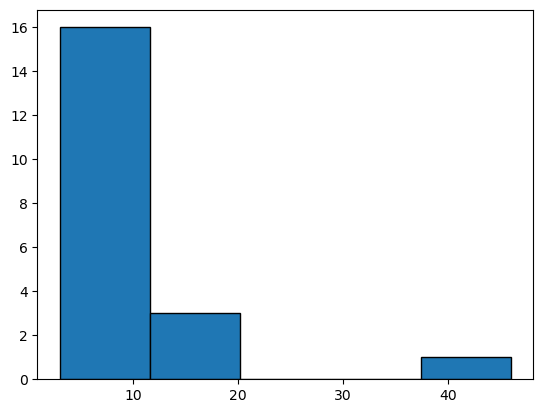

In [215]:
size,bins,patches=plt.hist([8,6,3,11,14,8,9,46,9,10,5,11,7,8,8,10,9,12,13,9],bins=5,edgecolor='black')
df = pd.DataFrame({'Lower Limit':bins[:-1],'Upper Limit':bins[1:],'Freq':size})
df

In [216]:
df['Midpoint'] = (df['Lower Limit']+df['Upper Limit']/2)
df['cumsum'] = df['Freq'].cumsum()
df

,Lower Limit,Upper Limit,Freq,Midpoint,cumsum
0,3.0,11.6,16.0,8.8,16.0
1,11.6,20.2,3.0,21.7,19.0
2,20.2,28.8,0.0,34.6,19.0
3,28.8,37.4,0.0,47.5,19.0
4,37.4,46.0,1.0,60.4,20.0


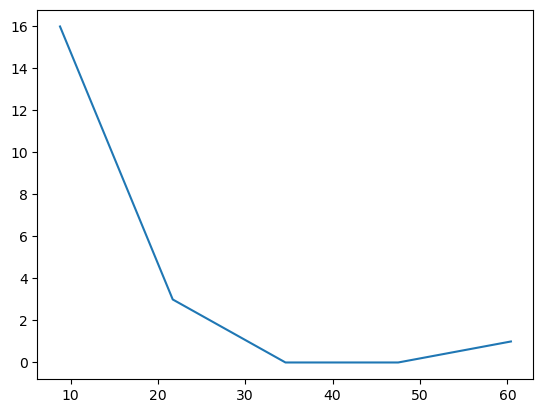

In [217]:
plt.plot(df['Midpoint'],df['Freq'])

In [222]:
mean = sum(df['Midpoint']*df['Freq'])/df['Freq'].sum()
print('Mean:',mean)
print('Median',3+(10)*7.6/(16))
print('Range:',df['Upper Limit'].iloc[-1]-df['Lower Limit'].iloc[0])

Mean: 13.315000000000001
Median 7.75
Range: 43.0


In [226]:
midpoint = df['Midpoint']
f = df['Freq']
n = sum(df['Freq'])
var = (sum(f*midpoint**2) - (sum(f*midpoint)**2)/n)/(n-1)
print('Var:',var)
print('standard_deviation:',np.sqrt(var))

Var: 144.9518684210526
standard_deviation: 12.03959585787881


array([ 6.        , 10.66666667, 15.33333333, 20.        , 24.66666667,
       29.33333333, 34.        ])

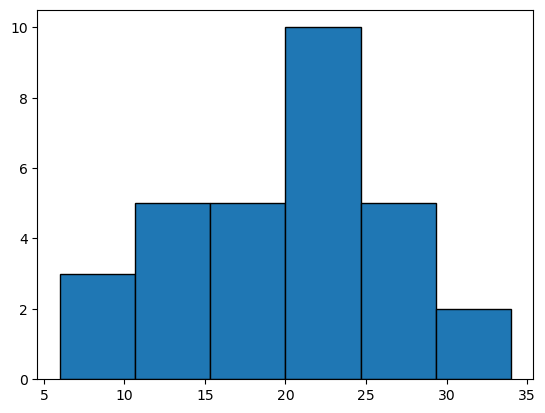

In [229]:
a = [8,14,13,34,26,25,15,18,20,24,23,28,15,10,6,28,21,20,12,16,19,20,17,27,22,22,16,23,31,22]
freq,bins,patches = plt.hist(x=a,bins=6,edgecolor = 'black')
bins

In [248]:
df = round(create_input_dataframe(bins[:-1],bins[1:],freq),ndigits=2)
mean = (df['Midpoint']*df['Freq']).sum()/(df['Freq'].sum()-1)
df

,Lower Limit,Upper Limit,Freq,cumsum,Midpoint
0,6.00,10.67,3.0,3.0,8.33
1,10.67,15.33,5.0,8.0,13.00
2,15.33,20.00,5.0,13.0,17.67
3,20.00,24.67,10.0,23.0,22.33
4,24.67,29.33,5.0,28.0,27.00
5,29.33,34.00,2.0,30.0,31.67


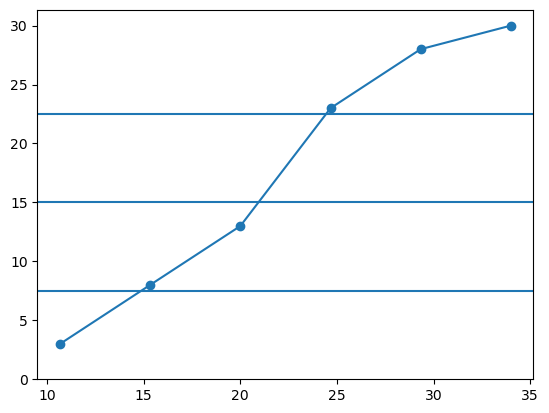

In [250]:
plt.plot(df['Upper Limit'],df['cumsum'],marker = 'o')
plt.ylim(0)
plt.axhline(15)
plt.axhline(7.5)
plt.axhline(22.5)

In [249]:
print('Mean:',mean)

Mean: 20.688965517241378


In [252]:
b = [5.2,8.7,3.9,6.8,19.5]
print('Arthimetic mean:',np.mean(b))
print('Geometric mean:',(np.prod(b))**(1/len(b)))

Arthimetic mean: 8.819999999999999
Geometric mean: 7.478700570898007


In [266]:
(284/113)**(1/5) - 1

0.20239726386152723

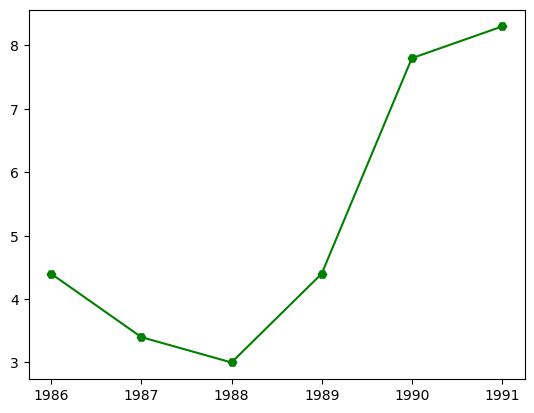

In [271]:
year = np.arange(1986,1992)
capital = np.array([4.4,3.4,3,4.4,7.8,8.3,])
plt.plot(year,capital,marker = 'H',color = 'green')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Operation'),
  Text(1, 0, 'Interest'),
  Text(2, 0, 'Joint Ventures'),
  Text(3, 0, 'Inventory of Logs'),
  Text(4, 0, 'Net income per common share')])

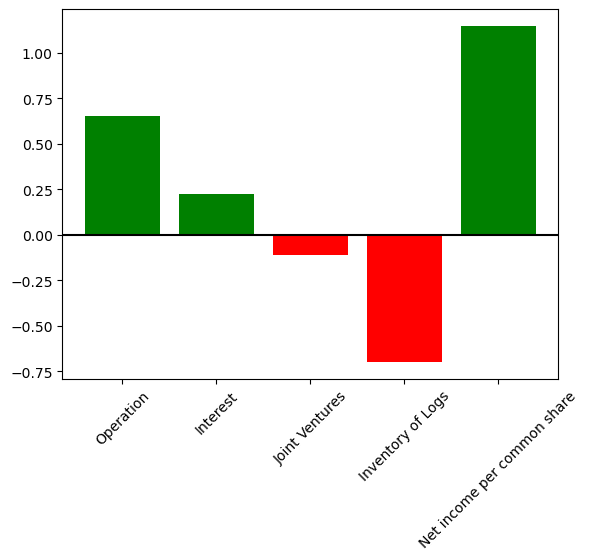

In [291]:
incomes = ['Operation','Interest','Joint Ventures','Inventory of Logs','Net income per common share']
year1 = np.array([74.4,2.7,118.5,21.9,0.54])
year2 = np.array([123.1,3.3,105,6.6,1.16])
colors = ['red' if value < 0 else 'green' for value in (year2-year1)]
plt.bar(incomes,(year2-year1)/year1,color = colors)
plt.axhline(0,color = 'black')
plt.xticks(rotation = 45)

In [6]:
c = [124,39,186,116,145,14,52,107,152,187,150,103,142,206,165,289,58,185,117,147,52,136,75,52,158,156,249,202,299,146,203,110,119,58,185,82,298,219,153,186,27,251,156,219,149,248,157,78,148,140]
len(c)

50

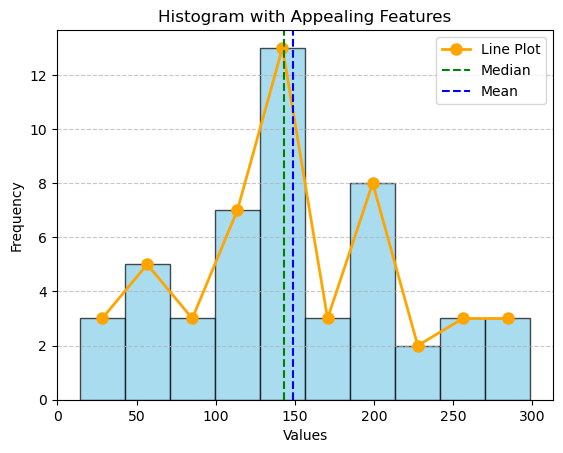

In [14]:
n,bins,patches = plt.hist(x=c,color='skyblue', edgecolor='black', alpha=0.7)
# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram with Appealing Features')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.plot(df['Midpoint'], n, color='orange', marker='o', linestyle='-', linewidth=2, markersize=8, label='Line Plot')


# Add a legend
plt.axvline(median,label='Median',linestyle='--',color = 'green')
plt.axvline(mean,label='Mean',linestyle='--',color = 'blue')
plt.legend()

# Show the plot
plt.show()

In [8]:
df = pd.DataFrame({'Lower Limit':bins[:-1],'Upper Limit':bins[1:],'Freq':n})
df['Midpoint'] = (df['Lower Limit'] + df['Upper Limit'])/2
df['cumsum']  = df['Freq'].cumsum()
df

,Lower Limit,Upper Limit,Freq,Midpoint,cumsum
0,14.0,42.5,3.0,28.25,3.0
1,42.5,71.0,5.0,56.75,8.0
2,71.0,99.5,3.0,85.25,11.0
3,99.5,128.0,7.0,113.75,18.0
4,128.0,156.5,13.0,142.25,31.0
5,156.5,185.0,3.0,170.75,34.0
6,185.0,213.5,8.0,199.25,42.0
7,213.5,242.0,2.0,227.75,44.0
8,242.0,270.5,3.0,256.25,47.0
9,270.5,299.0,3.0,284.75,50.0


In [10]:
mean = (sum(df['Freq']*df['Midpoint']))/(df['cumsum'].iloc[-1])
mean

149.09

In [11]:

def calculate_percentile(df,p):
    # Calculate the position of the quartile
    p_position = df['cumsum'].iloc[-1] * (p * 0.01)

    # Find the index corresponding to the quartile position
    p_index = np.argmax(df['cumsum'] >= p_position)

    # Extract relevant values from the DataFrame
    cf = df['cumsum'].iloc[p_index - 1]
    lower_limit_p = df['Lower Limit'].iloc[p_index]
    upper_limit_p = df['Lower Limit'].iloc[p_index + 1]
    class_freq = df['Freq'].iloc[p_index]

    # Calculate the quartile using interpolation
    percentile = lower_limit_p + (p_position - cf) * (upper_limit_p - lower_limit_p) / class_freq

    return percentile

In [12]:
median = calculate_percentile(df,50)

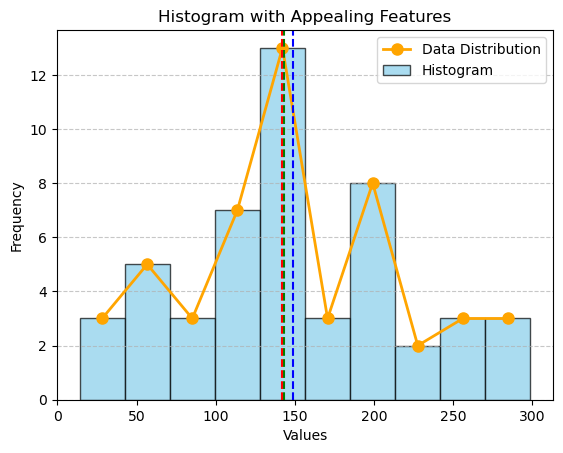

(None, '')

In [330]:
# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram with Appealing Features')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.plot(df['Midpoint'], n, color='orange', marker='o', linestyle='-', linewidth=2, markersize=8, label='Line Plot')
plt.hist(x=c,color='skyblue', edgecolor='black', alpha=0.7)


# Add a legend
plt.legend(['Data Distribution','Histogram'])
plt.axvline(median,label='Median',linestyle='--',color = 'green')
plt.axvline(mean,label='Median',linestyle='--',color = 'blue')
plt.axvline(df['Midpoint'][np.argmax(df['Freq'])],linestyle ='--',color = 'red',label='Mode')

# Show the plot
,plt.show(),

In [335]:

# Assuming you have already defined midpoint and f from your DataFrame
midpoint = df['Midpoint']
f = df['Freq']

# Calculate mean and median
mean = np.mean(midpoint)
median = np.median(midpoint)

# Calculate variance and standard deviation
n = len(f)
var = (np.sum(df['Freq'] * (df['Midpoint']**2)) - (np.sum(df['Midpoint'] * df['Freq']))**2 / n) / (n - 1)

if var < 0:
    print("Variance is negative. Check the formula or data.")
std = np.sqrt(var)

# Calculate skewness
skewnwss = 3 * (mean - median) / std

# Print results
print('Standard Deviation:', var)
print('Skewness:', skewnwss)


Variance is negative. Check the formula or data.
Standard Deviation: -468219.6555555556
Skewness: nan


C:\Users\kakut\AppData\Local\Temp\ipykernel_7712\136964602.py:15: RuntimeWarning: invalid value encountered in sqrt
  std = np.sqrt(var)


In [364]:
d = [8,30,4,18,20,29,5,36,23,1,16,28,28,11,19,15,9,2,20,18,14,14,5,3,16,1,3,5,23,18,34,20,4,7,13,15,9,33,27,10,15,5,16,6,14,0,20,5,21,10,26,15,13,13,2,23,9,2,4,6,17,15,31,5,33,16,10,34,7,30,14,8,6,13,26,19,16,3,32,23,7,26,22,23,5]

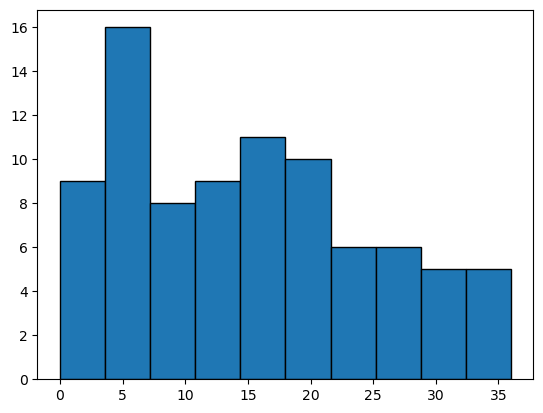

In [349]:
n,bins,patches = plt.hist(x=d,edgecolor = 'black')

In [351]:
df = pd.DataFrame({'Lower Limit':bins[:-1],'Upper Limit':bins[1:],'Freq':n})
df['Midpoint'] = (df['Lower Limit']+df['Upper Limit'])/2
df['cumsum'] = df['Freq'].cumsum()
df

,Lower Limit,Upper Limit,Freq,Midpoint,cumsum
0,0.0,3.6,9.0,1.8,9.0
1,3.6,7.2,16.0,5.4,25.0
2,7.2,10.8,8.0,9.0,33.0
3,10.8,14.4,9.0,12.6,42.0
4,14.4,18.0,11.0,16.2,53.0
5,18.0,21.6,10.0,19.8,63.0
6,21.6,25.2,6.0,23.4,69.0
7,25.2,28.8,6.0,27.0,75.0
8,28.8,32.4,5.0,30.6,80.0
9,32.4,36.0,5.0,34.2,85.0


In [352]:
mean = sum(df['Freq']*df['Midpoint'])/(df['cumsum'].iloc[-1])
median = calculate_percentile(df,50)
mode = df['Midpoint'][(np.argmax(df['Freq']))]
mode

5.4

In [353]:

# Assuming you have already defined midpoint and f from your DataFrame
midpoint = df['Midpoint']
f = df['Freq']

# Calculate variance and standard deviation
n = len(f)
var = ((np.sum(df['Midpoint'] * df['Freq']))**2 / n - np.sum(df['Freq'] * (df['Midpoint']**2))) / (n - 1)

if var < 0:
    print("Variance is negative. Check the formula or data.")
std = np.sqrt(var)

# Calculate skewness
skewnwss = 3 * (mean - median) / std

# Print results
print('Standard Deviation:', var)
print('Skewness:', skewnwss)


Standard Deviation: 15443.963999999998
Skewness: 0.014964376635640658


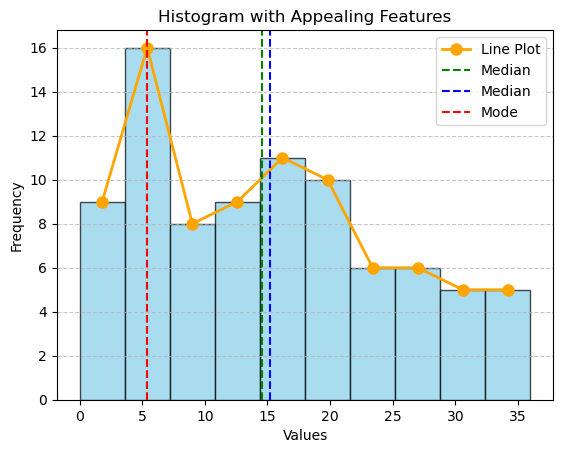

(None,)

In [376]:
# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram with Appealing Features')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.plot(df['Midpoint'], df['Freq'], color='orange', marker='o', linestyle='-', linewidth=2, markersize=8, label='Line Plot')
plt.hist(d,color='skyblue', edgecolor='black', alpha=0.7)


# Add a legend
plt.axvline(median,label='Median',linestyle='--',color = 'green')
plt.axvline(mean,label='Median',linestyle='--',color = 'blue')
plt.axvline(df['Midpoint'][np.argmax(df['Freq'])],linestyle ='--',color = 'red',label='Mode')
plt.legend()

# Show the plot
plt.show(),

In [383]:
e = [11.1,18.9,14.4,9.5,17.1,11.1,10.5,17.7,14.3,11.1,13.6,12.2,11.9,13.8,13.2,13.2,11.2,11.9,12.3,11.8,13.2,10.7,14.7,12.7,13.8,13.7,13.5,16.8,11.4,16.6,15.1,12.4,10.7,15.1,15.4,17.5,15.9,12.2,12.8,19.2,12.9,14.1,18.3,13.9,15.4,15.1,13.2,14.7,11.1,14.7,14.5]

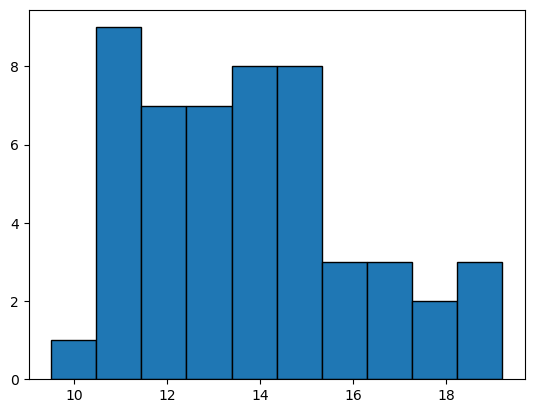

In [386]:
n,bins,patch = plt.hist(x=e,edgecolor = 'black')

In [391]:
df = pd.DataFrame({'Lower Limit':bins[:-1],'Upper Limit':bins[1:],'Freq':n})
df['Midpoint'] = (df['Lower Limit']+df['Upper Limit'])/2
df['cumsum'] = df['Freq'].cumsum()
df

,Lower Limit,Upper Limit,Freq,Midpoint,cumsum
0,9.50,10.47,1.0,9.985,1.0
1,10.47,11.44,9.0,10.955,10.0
2,11.44,12.41,7.0,11.925,17.0
3,12.41,13.38,7.0,12.895,24.0
4,13.38,14.35,8.0,13.865,32.0
5,14.35,15.32,8.0,14.835,40.0
6,15.32,16.29,3.0,15.805,43.0
7,16.29,17.26,3.0,16.775,46.0
8,17.26,18.23,2.0,17.745,48.0
9,18.23,19.20,3.0,18.715,51.0


In [394]:
mean = sum(df['Midpoint']*df['Freq'])/df['cumsum'].iloc[-1]
median = calculate_percentile(df,50)
mode = df['Midpoint'][np.argmax(df['Freq'])]


10.955

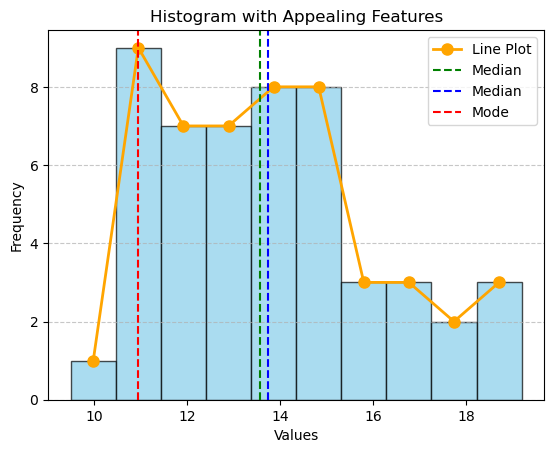

(None,)

In [396]:
# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram with Appealing Features')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.plot(df['Midpoint'], df['Freq'], color='orange', marker='o', linestyle='-', linewidth=2, markersize=8, label='Line Plot')
plt.hist(e,color='skyblue', edgecolor='black', alpha=0.7)


# Add a legend
plt.axvline(median,label='Median',linestyle='--',color = 'green')
plt.axvline(mean,label='Median',linestyle='--',color = 'blue')
plt.axvline(df['Midpoint'][np.argmax(df['Freq'])],linestyle ='--',color = 'red',label='Mode')
plt.legend()

# Show the plot
plt.show(),

In [406]:
var = np.var(e,ddof=1) 
std = np.sqrt(var)
skewness = 3*(mean - median)/std
print('Variance',var)
print('Srandard Deviation:',std)
print('Skewness:',skewness)
print('Mean:',mean)

Variance 5.313066666666669
Srandard Deviation: 2.3050090383047674
Skewness: 0.24599559021276363
Mean: 13.750882352941177


In [6]:
ll = np.array([0,3,5,7,10,15,20,25,50])*1000
ul = np.array([2999,4999,6999,9999,14999,19999,24999,49999,float('inf')])
women = np.array([533,401,1108,3218,7527,5926,4085,4297,289])
men = np.array([924,422,814,2233,5872,6621,6425,17489,4141])
df = pd.DataFrame({'Lower Limit':ll,'Upper Limit':ul,'Women':women,'Men':men})
df['cumsum_men'] = df['Men'].cumsum()
df['cumsum_women'] = df['Women'].cumsum()
df['Midpoint'] = (df['Lower Limit']+df['Upper Limit'])/2
df

,Lower Limit,Upper Limit,Women,Men,cumsum_men,cumsum_women,Midpoint
0,0,2999.0,533,924,924,533,1499.5
1,3000,4999.0,401,422,1346,934,3999.5
2,5000,6999.0,1108,814,2160,2042,5999.5
3,7000,9999.0,3218,2233,4393,5260,8499.5
4,10000,14999.0,7527,5872,10265,12787,12499.5
5,15000,19999.0,5926,6621,16886,18713,17499.5
6,20000,24999.0,4085,6425,23311,22798,22499.5
7,25000,49999.0,4297,17489,40800,27095,37499.5
8,50000,inf,289,4141,44941,27384,inf


(0.0, 54000.0)

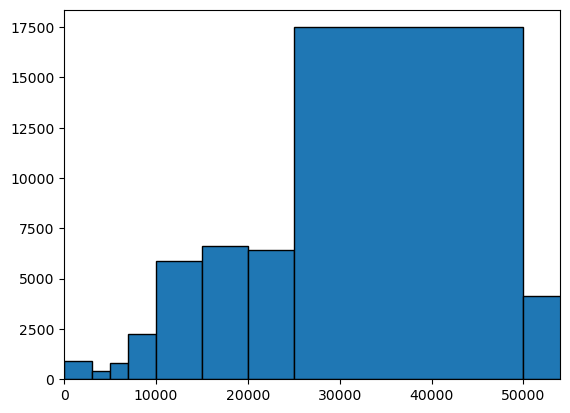

In [7]:
bins = np.append(df['Lower Limit'],100000)
plt.hist(bins[:-1],bins,weights=df['Men'],edgecolor = 'black')
plt.xlim(0,54000)

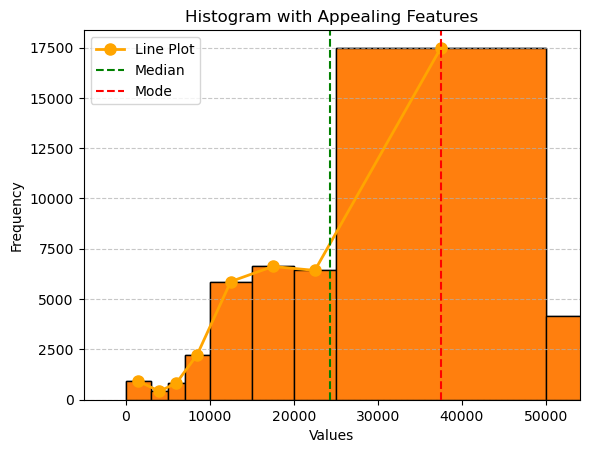

In [22]:
plt.hist(bins[:-1],bins,weights=df['Men'],edgecolor = 'black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram with Appealing Features')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.plot(df['Midpoint'], df['Men'], color='orange', marker='o', linestyle='-', linewidth=2, markersize=8, label='Line Plot')
plt.hist(bins[:-1],bins,weights=df['Men'],edgecolor = 'black')


# Add a legend
plt.axvline(calculate_percentile_men(df,50),label='Median',linestyle='--',color = 'green')
plt.axvline(df['Midpoint'][np.argmax(df['Men'])],linestyle ='--',color = 'red',label='Mode')
plt.legend()

# Show the plot
plt.xlim(right = 54000)
plt.show()


(0.0, 54000.0)

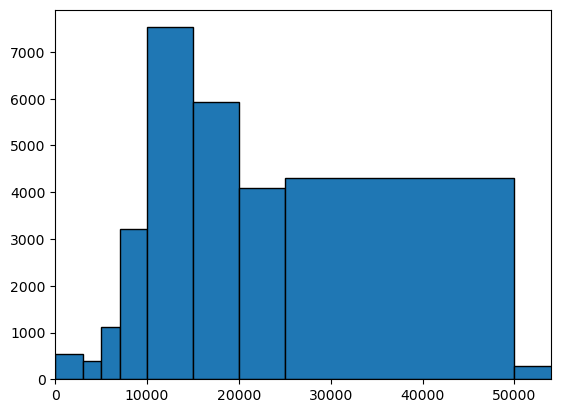

In [12]:
bins = np.append(df['Lower Limit'],100000)
plt.hist(bins[:-1],bins,weights=df['Women'],edgecolor = 'black')
plt.xlim(0,54000)

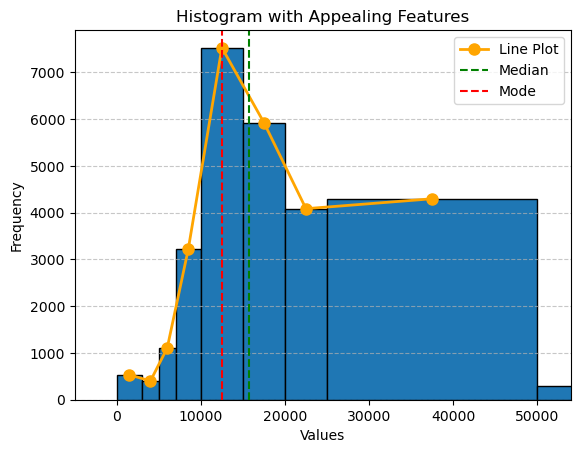

In [25]:

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram with Appealing Features')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.plot(df['Midpoint'], df['Women'], color='orange', marker='o', linestyle='-', linewidth=2, markersize=8, label='Line Plot')
plt.hist(bins[:-1],bins,weights=df['Women'],edgecolor = 'black')


# Add a legend
plt.axvline(calculate_percentile_women(df,50),label='Median',linestyle='--',color = 'green')
plt.axvline(df['Midpoint'][np.argmax(df['Women'])],linestyle ='--',color = 'red',label='Mode')
plt.legend()

# Show the plot
plt.xlim(right = 54000)
plt.show()


In [13]:

def calculate_percentile_men(df,p):
    # Calculate the position of the quartile
    p_position = df['cumsum_men'].iloc[-1] * (p * 0.01)

    # Find the index corresponding to the quartile position
    p_index = np.argmax(df['cumsum_men'] >= p_position)

    # Extract relevant values from the DataFrame
    cf = df['cumsum_men'].iloc[p_index - 1]
    lower_limit_p = df['Lower Limit'].iloc[p_index]
    upper_limit_p = df['Lower Limit'].iloc[p_index + 1]
    class_freq = df['Men'].iloc[p_index]

    # Calculate the quartile using interpolation
    percentile = lower_limit_p + (p_position - cf) * (upper_limit_p - lower_limit_p) / class_freq

    return percentile



def calculate_percentile_women(df,p):
    # Calculate the position of the quartile
    p_position = df['cumsum_women'].iloc[-1] * (p * 0.01)

    # Find the index corresponding to the quartile position
    p_index = np.argmax(df['cumsum_women'] >= p_position)

    # Extract relevant values from the DataFrame
    cf = df['cumsum_women'].iloc[p_index - 1]
    lower_limit_p = df['Lower Limit'].iloc[p_index]
    upper_limit_p = df['Lower Limit'].iloc[p_index + 1]
    class_freq = df['Women'].iloc[p_index]

    # Calculate the quartile using interpolation
    percentile = lower_limit_p + (p_position - cf) * (upper_limit_p - lower_limit_p) / class_freq

    return percentile

In [14]:
print('25th percentile for men:',calculate_percentile_men(df,25))
print('25th percentile for women:',calculate_percentile_women(df,25))

25th percentile for men: 15732.706539797613
25th percentile for women: 11053.540587219344


In [15]:
print('75th percentile for men:',calculate_percentile_men(df,75))
print('75th percentile for women:',calculate_percentile_women(df,75))

75th percentile for men: 39858.98278918177
75th percentile for women: 22233.782129742962


In [16]:
print('Median for men:',calculate_percentile_men(df,50))
print('Median for women:',calculate_percentile_women(df,50))

Median for men: 24345.914396887158
Median for women: 15763.584205197436


In [17]:
print('Mode for men:',df['Midpoint'][np.argmax(df['Men'])])
print('Mode for women:',df['Midpoint'][np.argmax(df['Women'])])

Mode for men: 37499.5
Mode for women: 12499.5


In [439]:
var_men = (np.sum(df['Men']*df['Midpoint']**2)-(np.sum(df['Men']*df['Midpoint'])**2))/2/(df['cumsum_men'].iloc[-1]-1)
var

C:\Users\kakut\AppData\Local\Temp\ipykernel_7712\644949682.py:1: RuntimeWarning: invalid value encountered in double_scalars
  var_men = (np.sum(df['Men']*df['Midpoint']**2)          -          (np.sum(df['Men']*df['Midpoint'])**2))/2/(df['cumsum_men'].iloc[-1]-1)


5.313066666666669

In [19]:
f = [57,49,50,54,61,64,47,51,57,50,55,60,57,48,55,62,58,65,54,43,57,52,42,55,61,56,51,56,54,46,56,61,68,54,55,52,51,49,51,69,65]

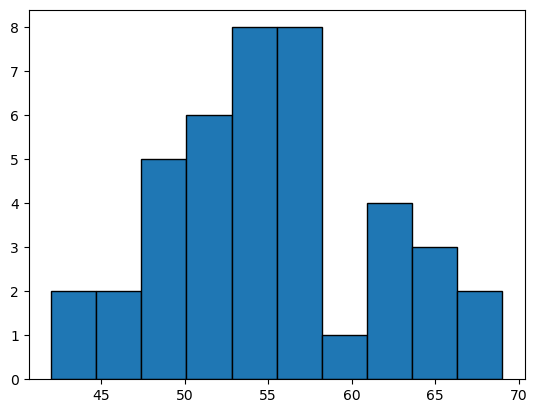

In [20]:
n,bins,patches = plt.hist(x=f,edgecolor='black')

In [21]:
df = pd.DataFrame({'Lower Limit':bins[:-1],'Upper Limit':bins[1:],'Freq':n})
df['Midpoint'] = (df['Lower Limit']+df['Upper Limit'])/2
df['cumsum'] = df['Freq'].cumsum()
df

,Lower Limit,Upper Limit,Freq,Midpoint,cumsum
0,42.0,44.7,2.0,43.35,2.0
1,44.7,47.4,2.0,46.05,4.0
2,47.4,50.1,5.0,48.75,9.0
3,50.1,52.8,6.0,51.45,15.0
4,52.8,55.5,8.0,54.15,23.0
5,55.5,58.2,8.0,56.85,31.0
6,58.2,60.9,1.0,59.55,32.0
7,60.9,63.6,4.0,62.25,36.0
8,63.6,66.3,3.0,64.95,39.0
9,66.3,69.0,2.0,67.65,41.0


In [22]:
mean = np.sum(df['Freq']*df['Midpoint'])/df['cumsum'].iloc[-1]
median = calculate_percentile(df,50)
mode = df['Midpoint'][np.argmax(df['Freq'])]
var = np.var(f,ddof=1)
std = np.std(f,ddof=1)
skewness = np.mean((f - mean) ** 3) / std**3
print('Mean:',mean)
print('Median:',median)
print('Mode:',mode)
print('Standard Deviation:',std)
print('Skewness:',skewness)

Mean: 55.0719512195122
Median: 54.65625
Mode: 54.15
Standard Deviation: 6.26653909228387
Skewness: 0.1986160750052436


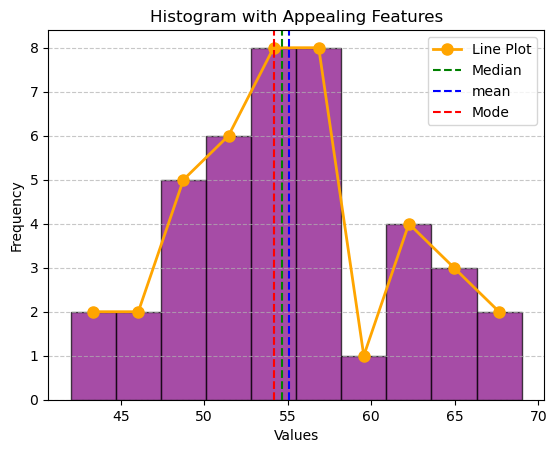

In [26]:
# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram with Appealing Features')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.plot(df['Midpoint'], df['Freq'], color='orange', marker='o', linestyle='-', linewidth=2, markersize=8, label='Line Plot')
plt.hist(f,color='purple', edgecolor='black', alpha=0.7)


# Add a legend
plt.axvline(median,label='Median',linestyle='--',color = 'green')
plt.axvline(mean,label='mean',linestyle='--',color = 'blue')
plt.axvline(df['Midpoint'][np.argmax(df['Freq'])],linestyle ='--',color = 'red',label='Mode')
plt.legend()

# Show the plot
plt.show()